# Part2 EDA

## 1. Overview of the Dataset(数据概况)

In this section, we take a first look at the cleaned housing dataset to understand the data types, key variables, and basic structure. This helps ensure that fields such as price, area, floor level, and building type are ready for visualization and modeling.

本部分先对清洗后的二手房数据进行初步概览，查看字段类型、主要变量以及基本结构，确保价格、面积、楼层、建筑类型等字段可用于后续可视化与建模。

In [1]:
import pandas as pd
df = pd.read_csv('C:\\Users\\lyp\\Desktop\\HousePrice\\data\\house_data_cleaned.csv')

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130 entries, 0 to 3129
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          3130 non-null   float64
 1   rooms          3130 non-null   float64
 2   halls          3130 non-null   float64
 3   area           3130 non-null   float64
 4   orientation    3130 non-null   object 
 5   decoration     2553 non-null   object 
 6   floor_level    3036 non-null   object 
 7   total_floor    3042 non-null   float64
 8   building_type  2491 non-null   object 
 9   community      3130 non-null   object 
 10  subdistrict    3130 non-null   object 
dtypes: float64(5), object(6)
memory usage: 269.1+ KB


,price,rooms,halls,area,total_floor
count,3.130000e+03,3130.000000,3130.000000,3130.000000,3042.000000
mean,2.102015e+06,2.958147,1.768690,111.059224,25.444773
std,1.501387e+06,0.818357,0.446044,38.472736,12.032500
min,2.650000e+05,1.000000,0.000000,25.510000,1.000000
25%,1.430000e+06,3.000000,2.000000,89.402500,15.000000
50%,1.800000e+06,3.000000,2.000000,103.355000,30.000000
75%,2.278750e+06,3.000000,2.000000,125.620000,34.000000
max,3.080000e+07,9.000000,4.000000,555.910000,58.000000


In [2]:
# Chinese font settings
# 显示中文字体
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题


## 2.Distributions (分布情况)

### 2.1 Price Distribution 价格分布

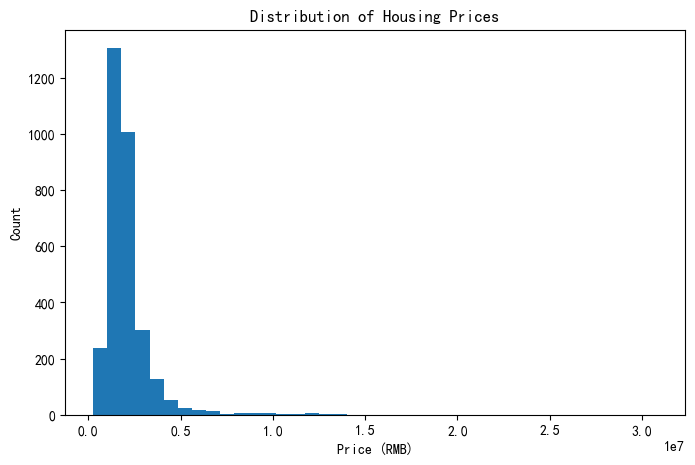

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [3]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["price"], bins=40)
plt.title("Distribution of Housing Prices")
plt.xlabel("Price (RMB)")
plt.ylabel("Count")
plt.show()
plt.figure(figsize=(8,5))

### 2.2Area Distribution面积分布

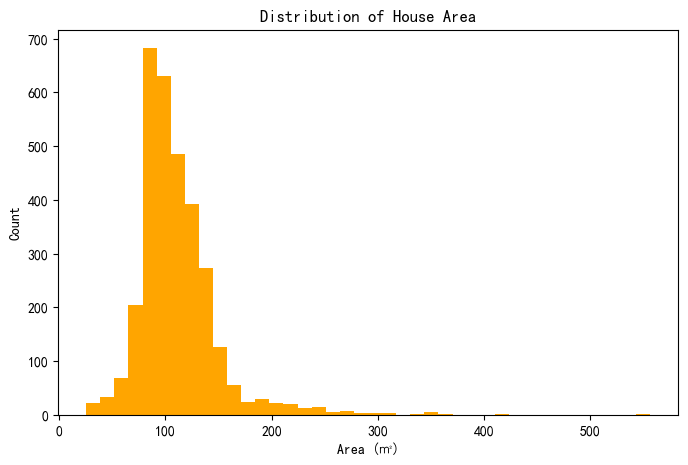

In [4]:
plt.figure(figsize=(8,5))
plt.hist(df["area"], bins=40, color="orange")
plt.title("Distribution of House Area")
plt.xlabel("Area (㎡)")
plt.ylabel("Count")
plt.show()

## 3. Relationship 相关关系

### 3.1 Area VS Price 面积与价格

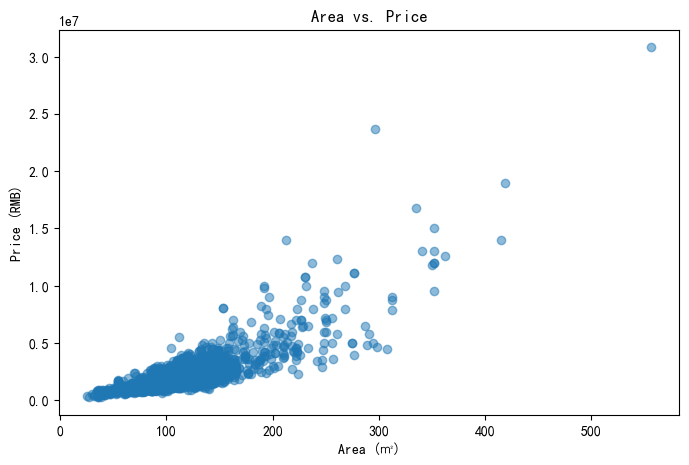

In [5]:
plt.figure(figsize=(8,5))
plt.scatter(df["area"], df["price"], alpha=0.5)
plt.title("Area vs. Price")
plt.xlabel("Area (㎡)")
plt.ylabel("Price (RMB)")
plt.show()


### 3.2 Floor VS Price 楼层类型与房价

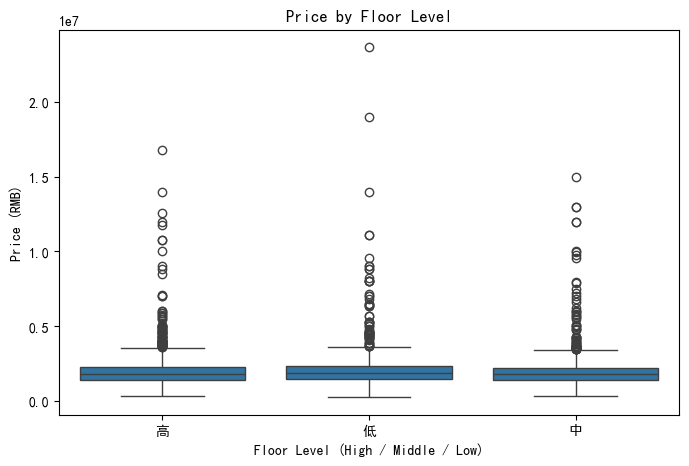

In [6]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.boxplot(x="floor_level", y="price", data=df)
plt.title("Price by Floor Level")
plt.xlabel("Floor Level (High / Middle / Low)")
plt.ylabel("Price (RMB)")
plt.show()


### 3.3 Price Differences Across Subdistricts 不同片区房价差异

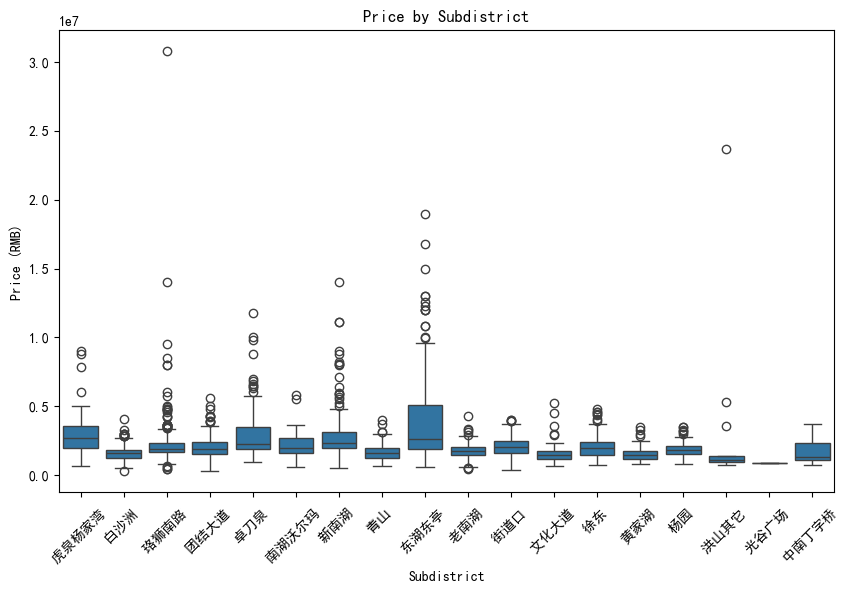

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(x="subdistrict", y="price", data=df)
plt.xticks(rotation=45)
plt.title("Price by Subdistrict")
plt.xlabel("Subdistrict")
plt.ylabel("Price (RMB)")
plt.show()


### 3.4 Price by Building Type 建筑类型与房价

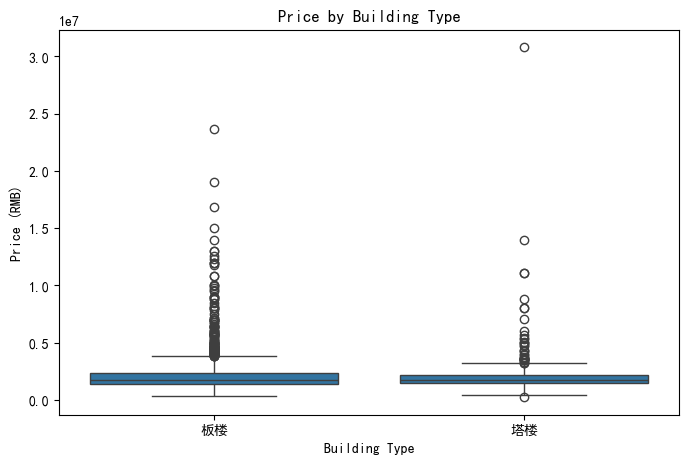

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x="building_type", y="price", data=df)
plt.title("Price by Building Type")
plt.xlabel("Building Type")
plt.ylabel("Price (RMB)")
plt.show()


### 3.5 Correlation Heatmap 相关性热力图

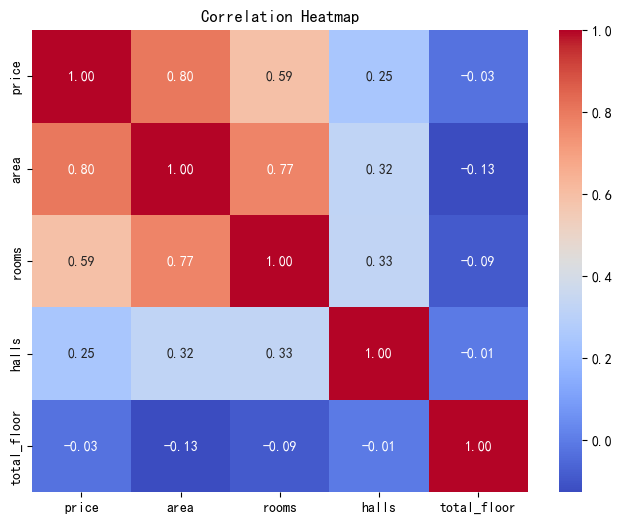

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["price","area","rooms","halls","total_floor"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## 4.Key findings

Housing prices show a right-skewed distribution with clear high-value outliers.

Area is strongly correlated with price, indicating it is a key feature.

High floors tend to be slightly more expensive, potentially due to better lighting and views.

Significant price variation exists across subdistricts, showing strong location effects.

Building type also affects pricing, with slab-style buildings often priced higher.

Numeric correlations confirm that area and rooms are the strongest predictors.



房价呈右偏分布，并存在明显的高价异常点。

面积与房价相关性最强，是核心影响因素。

高楼层房源往往价格更高，可能与采光和视野更佳有关。

不同片区之间的房价差异明显，区域因素非常重要。

建筑类型也影响房价，板楼通常略高于塔楼。

相关性分析显示，面积、房间数是预测价格的关键特征。